## Step 1: EDA

In [1]:
## load required packages
import pandas as pd
import numpy as np 
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
## Load the data and check
import os 
os.chdir(r'D:\Dataset\Side_project_Video_Game_Sales')
print(os.getcwd())

# print out some rows
games = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
print(games.head())

# overview 
print(games.info())

# check NAs
print(games.isnull().any())

os.chdir(r'D:\Project\Side_project_Video_Game_Sales')

D:\Dataset\Side_project_Video_Game_Sales
                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
Name: Platform, dtype: int64


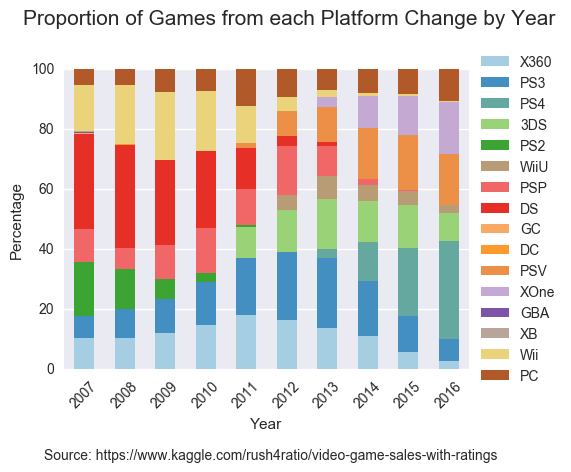

In [15]:
## Column: Platform
print(games.Platform.value_counts()[:10])

# Visualization: the change of platforms by years
games_yr = games.groupby(['Year_of_Release'])
#print(games_yr['Platform'].value_counts())
year_index = [float(x) for x in range(2007, 2017)]
plat_index = []
for year in year_index:
    plat_index.extend(list(games_yr['Platform'].value_counts()[year].index))
plat_index = list(set(plat_index))
# create the data frame for platforms and years
plat_year = pd.DataFrame(columns=year_index, index=list(set(plat_index)))
for year in year_index:
    plat_year[year] = games_yr['Platform'].value_counts()[year]
plat_year.columns = [str(int(x)) for x in year_index]
# fill the NAs as 0
plat_year.fillna(0)
# calculate the percentage for each platform in each year
plat_year_perc = plat_year.apply(lambda x: x/np.sum(x)*100, axis=0)
# plotting
sns.set_style("darkgrid")
plt.figure(figsize=[200, 200])
plat_year_perc.transpose().plot(kind='bar', stacked=True, colormap='Paired', edgecolor='none')
plt.subplots_adjust(bottom=0.15, right=0.8)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.suptitle('Proportion of Games from each Platform Change by Year', fontsize=15, y=1.05, horizontalalignment='center')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.ylim([0, 100])
plt.xticks(range(len(plat_year.columns)), plat_year.columns, rotation=45)
plt.text(-1, -30, 'Source: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings')
#plt.show()
plt.savefig('platform_by_yrs.png', dpi=600)

#### From the graph above, we can spot some trends for the evolution of platforms with years, such as the growth of share of PS4 from 2013 to 2016, from around 3% to nearly 40%.

In [22]:
genre_perc

array([ 20.15911946,  14.04558234,  10.46838548,   8.97290184,
         7.91409942,   7.79446073,   7.47143626,   5.31195789,
         5.2282108 ,   5.07866244,   4.0856613 ,   3.46952204])

0          Sports
1        Platform
2          Racing
3          Sports
4    Role-Playing
5          Puzzle
6        Platform
7            Misc
8        Platform
9         Shooter
Name: Genre, dtype: object
Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64


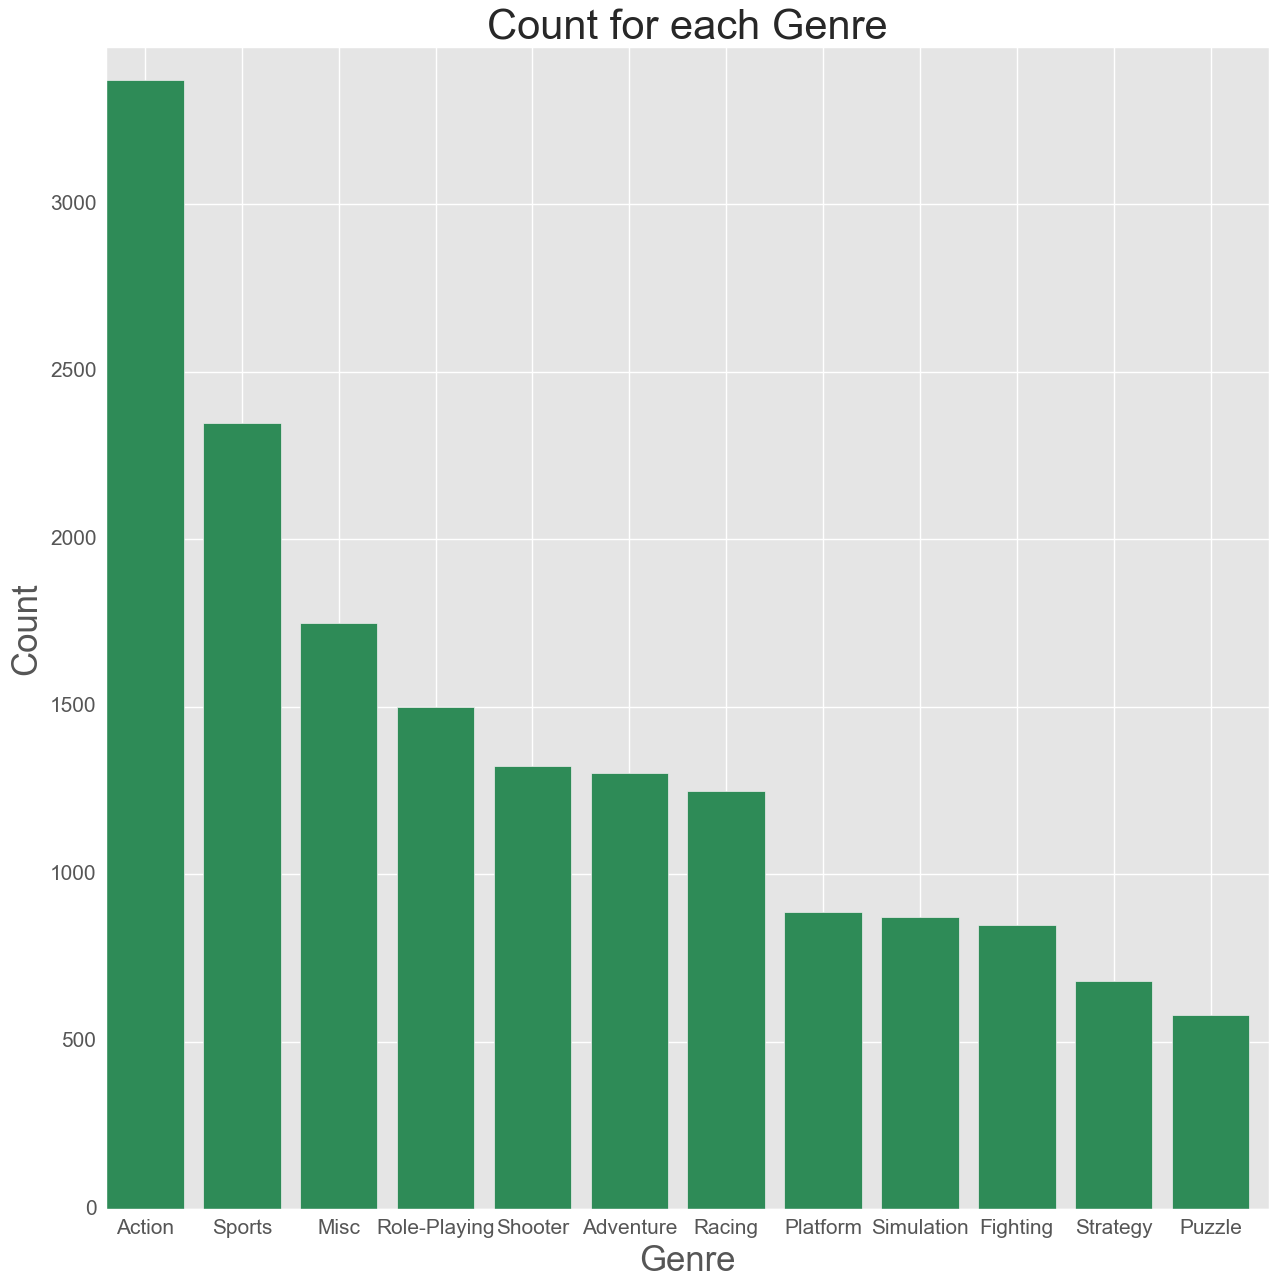

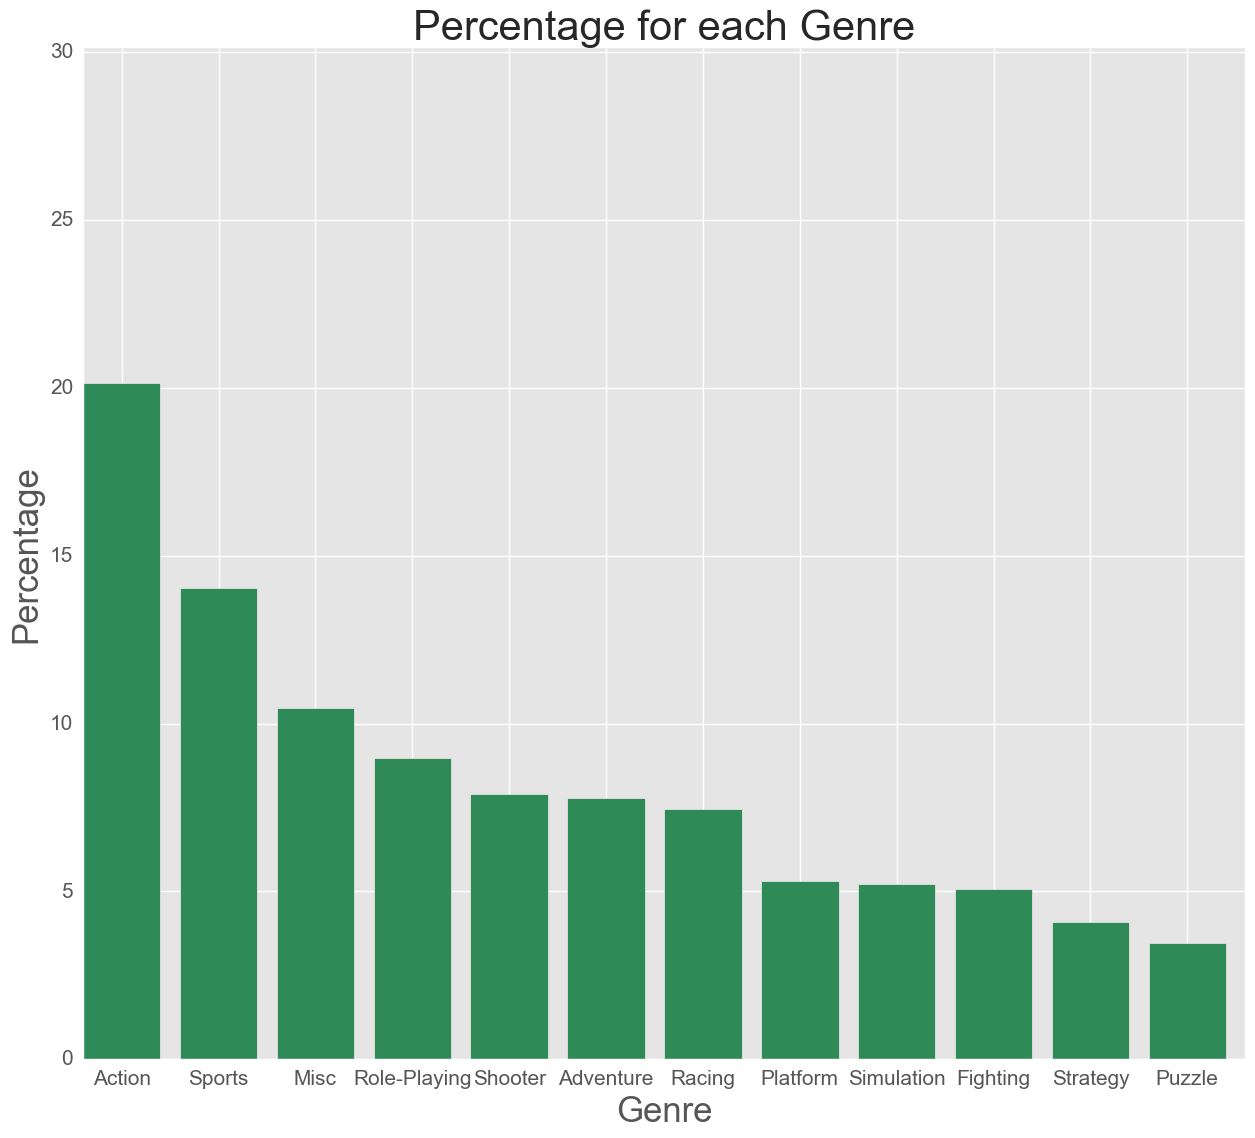

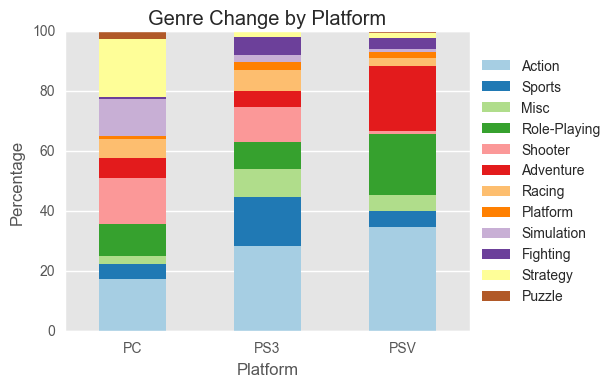

In [23]:
## Column: Genre
print(games.Genre[:10])
print(games.Genre.value_counts())

# Visualization: bar plot on count of Genres
genre_name = list(games.Genre.value_counts().index)
genre_count = list(games.Genre.value_counts().values)

import matplotlib
matplotlib.style.use('ggplot')  
fig, axes = plt.subplots(figsize=[15, 15])
axes.bar(list(range(len(genre_name))), genre_count, color='#2E8B57', width=0.8)
axes.tick_params(labelsize=15)
axes.set_xticks(np.arange(len(genre_name))+0.4)
axes.set_xticklabels(genre_name, fontsize=15)
axes.set_xlabel('Genre', fontsize=25)
axes.set_ylabel('Count', fontsize=25)
axes.set_ylim(0, max(genre_count)+100)
axes.set_title('Count for each Genre', fontsize=30, loc='center')
#fig.suptitle('', fontsize=30, y=0.88, horizontalalignment='center')
#plt.subplots_adjust(top=0.8)
#fig.tight_layout()
plt.savefig('Count_for_each_Genre.png', dpi=300)

# Visualization: bar plot on ratio of Genres
genre_name = list(games.Genre.value_counts().index)
genre_perc = pd.DataFrame(games.Genre.value_counts()).apply(lambda x: (x/np.sum(x))*100, axis=0).values.ravel()

import matplotlib
matplotlib.style.use('ggplot')  
fig, axes = plt.subplots(figsize=[15, 15])
axes.bar(list(range(len(genre_name))), genre_perc, color='#2E8B57', width=0.8)
axes.tick_params(labelsize=15)
axes.set_xticks(np.arange(len(genre_name))+0.4)
axes.set_xticklabels(genre_name, fontsize=15)
axes.set_xlabel('Genre', fontsize=25)
axes.set_ylabel('Percentage', fontsize=25)
axes.set_ylim(0, max(genre_perc)+10)
axes.set_title('Percentage for each Genre', fontsize=30, loc='center')
#fig.suptitle('', fontsize=30, y=0.88, horizontalalignment='center')
plt.subplots_adjust(top=0.8)
#fig.tight_layout()
plt.savefig('Percentage_for_each_Genre.png', dpi=300)

# Visualization: games' genre for PC, PS3, and PSV
# platform name
plat_type = ['PC', 'PS3', 'PSV']

games_plat = games.groupby(['Platform'])

genre_index = list(games['Genre'].value_counts().index)

genre_plat_df = pd.DataFrame(columns=plat_type, index=genre_index)
for plat in plat_type:
    genre_plat_df[plat] = games_plat['Genre'].value_counts()[plat]

genre_plat_df.fillna(0)

genre_plat_perc = genre_plat_df.apply(lambda x: x/np.sum(x)*100, axis=0)

plt.figure(figsize=[200, 200])
genre_plat_perc.transpose().plot(kind='bar', stacked=True, colormap='Paired', edgecolor='none', rot=0) # rot=0 makes the 
# ticklabels in x-axis to be rotated
plt.subplots_adjust(bottom=0.15, right=0.8)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Genre Change by Platform')
plt.xlabel('Platform')
plt.ylabel('Percentage')
plt.ylim([0, 100])
plt.savefig('Genre_change_by_platform.png', dpi=300)

#### From the first two praphs, we can find out that the genre "Action" is the most popular one within all the genres, which accounts for about 20%. And from the third graph, we can also find out some apparent compositions within the major three types of platforms, the desktop, television-related and portable.

Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
Name: Publisher, dtype: int64


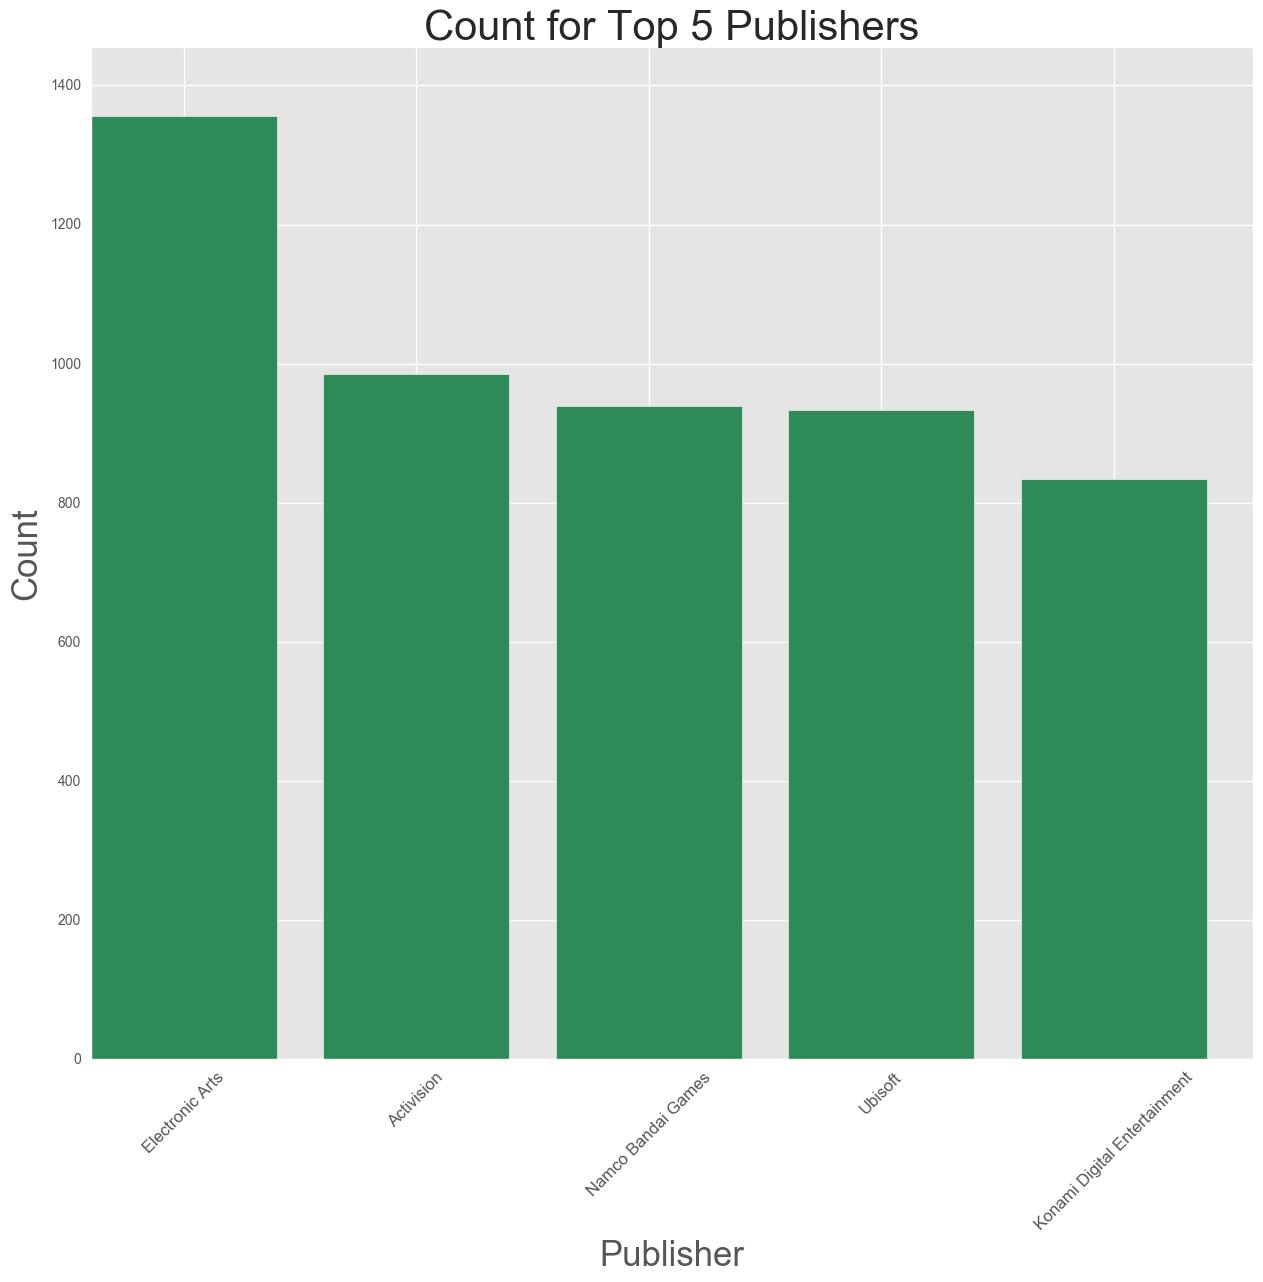

In [25]:
## Column: Publisher 
# Visualization: the top 5 game publishers and their count of games released
print(games['Publisher'].value_counts().sort_values(ascending=False)[:5])
top_5_publisher = games['Publisher'].value_counts().sort_values(ascending=False)[:5]
top_5_name = list(top_5_publisher.index)
top_5_value = top_5_publisher.values

import matplotlib
matplotlib.style.use('ggplot')  
fig, axes = plt.subplots(figsize=[15, 15])
axes.bar(list(range(len(top_5_name))), top_5_value, color='#2E8B57', width=0.8)
#axes.tick_params(labelsize=8)
axes.set_xticks(np.arange(len(top_5_name))+0.4)
axes.set_xticklabels(top_5_name, fontsize=12, rotation=45)
axes.set_xlabel('Publisher', fontsize=25)
axes.set_ylabel('Count', fontsize=25)
axes.set_ylim(0, max(top_5_value)+100)
axes.set_title('Count for Top 5 Publishers', fontsize=30, loc='center')
#fig.suptitle('', fontsize=30, y=0.88, horizontalalignment='center')
plt.subplots_adjust(top=0.8)
#fig.tight_layout()
plt.savefig('Count_for_top_5_publishers.png', dpi=300)

In [29]:
## Median global sales by genre

games_genre = games.groupby(['Genre'])
print(games_genre['Global_Sales'].median())

Genre
Action          0.19
Adventure       0.05
Fighting        0.20
Misc            0.16
Platform        0.27
Puzzle          0.11
Racing          0.19
Role-Playing    0.18
Shooter         0.23
Simulation      0.15
Sports          0.22
Strategy        0.09
Name: Global_Sales, dtype: float64


NA_Sales       4402.62
EU_Sales       2424.67
JP_Sales       1297.43
Other_Sales     791.34
dtype: float64
             Total_Sales
NA_Sales         4402.62
EU_Sales         2424.67
JP_Sales         1297.43
Other_Sales       791.34


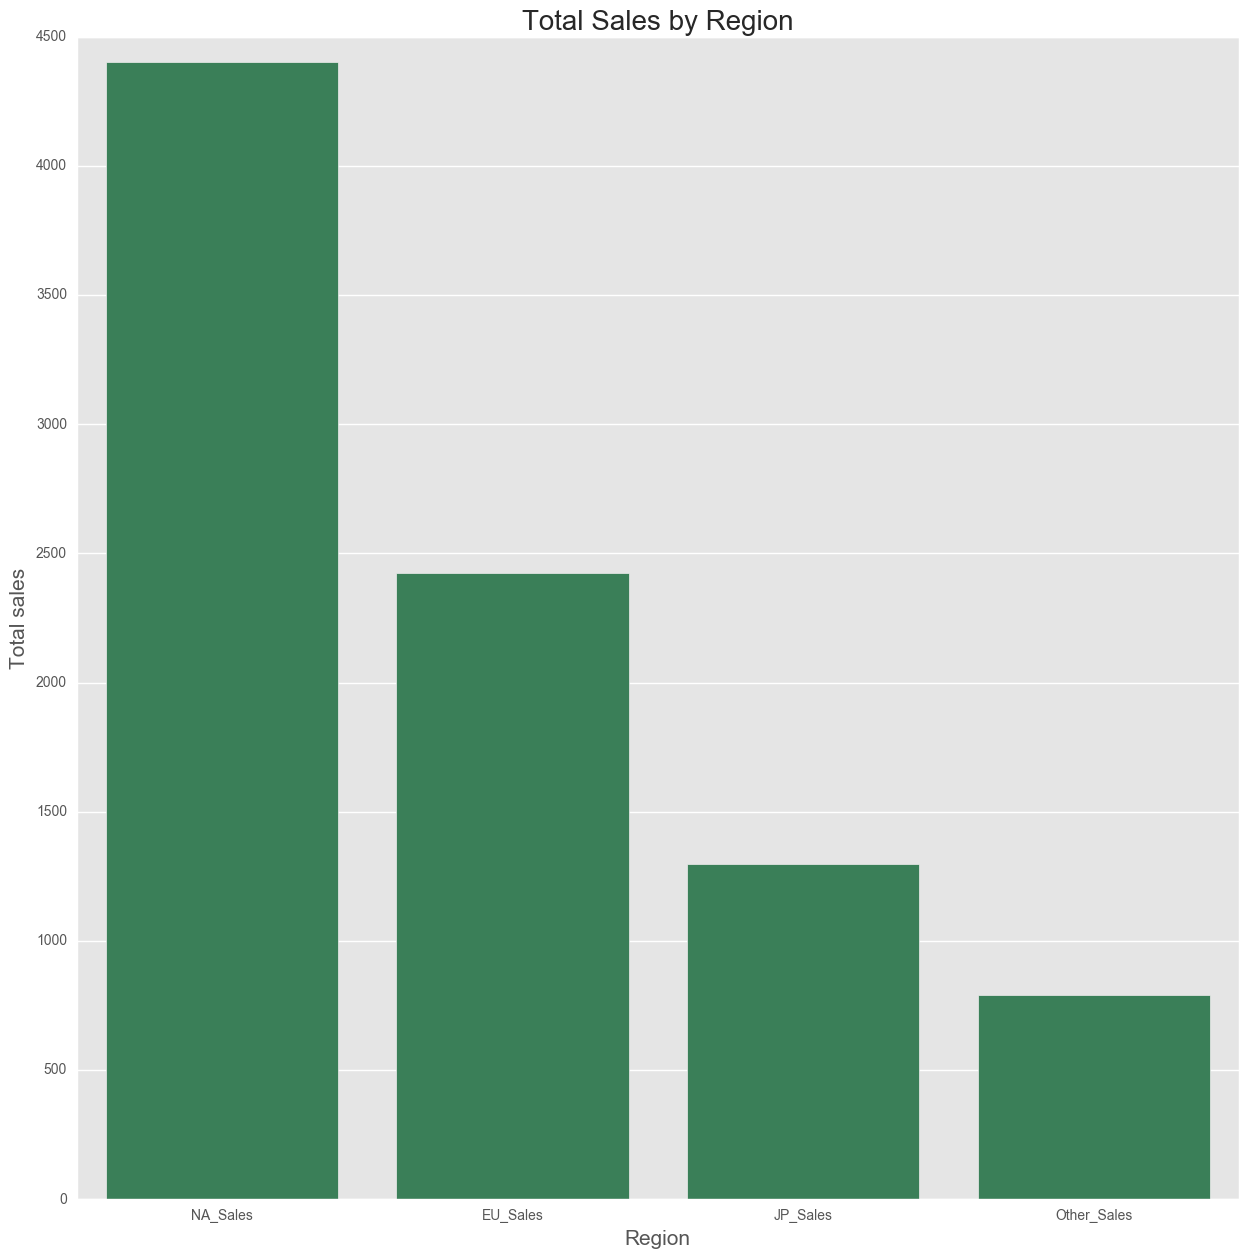

In [85]:
## Market value for video games by region 

games_sales_region = games.ix[:, ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=0)
print(games_sales_region)

games_sales_region_df = pd.DataFrame(games_sales_region, columns=['Total_Sales'])
print(games_sales_region_df)

plt.figure(figsize=[15, 15])
sns.barplot(x=list(games_sales_region_df.index), y='Total_Sales', data=games_sales_region_df, color='#2E8B57')
plt.title('Total Sales by Region', fontsize=20)
plt.ylabel('Total sales', fontsize=15)
plt.xlabel('Region', fontsize=15)

In [81]:
## the top 5 most critized games by critics and users 

# for critics 
critic_count = games['Critic_Count']
critic_count[critic_count.isnull()] = 0
print(games.ix[np.argsort(critic_count.values)[::-1][:5], :])

# for users 
user_count = games['User_Count']
user_count[user_count.isnull()] = 0
print(games.ix[np.argsort(user_count.values)[::-1][:5], :])

                            Name Platform  Year_of_Release      Genre  \
171   Uncharted 4: A Thief's End      PS4           2016.0    Shooter   
463                   Heavy Rain      PS3           2010.0  Adventure   
3606               Quantum Break     XOne           2016.0     Action   
121   Uncharted 2: Among Thieves      PS3           2009.0     Action   
6996                      XCOM 2       PC           2016.0   Strategy   

                        Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
171   Sony Computer Entertainment      1.85      2.50      0.19         0.85   
463   Sony Computer Entertainment      1.29      1.21      0.06         0.47   
3606       Microsoft Game Studios      0.30      0.20      0.01         0.05   
121   Sony Computer Entertainment      3.27      2.20      0.21         0.98   
6996         Take-Two Interactive      0.09      0.12      0.00         0.02   

      Global_Sales  Critic_Score  Critic_Count User_Score  User_Count  \
171    

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
